# Visualisation of the processed logger data

In [10]:
#IMPORT LIBRARIES
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from statannotations.Annotator import Annotator
import matplotlib.ticker as plticker
from matplotlib.lines import Line2D


healthColours = {'NN':'tab:blue','RES':'tab:green','DAM':'tab:orange'}
hueorder = ['NN','RES','DAM']

#Define the names of the langwell sites
sitesLW = {'Braemore','Strathy','Scaraben','Morven','Wag'}

In [11]:
# read in the data, and reorganise so that all the langwell sites are grouped together
mergeDf = pd.read_csv('EXPORT/p_mergedData.csv')
# make a subSite column to give each langwell site an individual name
mergeDf.insert(2,'subSite',mergeDf['Site'])
# rename the site column
for name in sitesLW:
    mergeDf['Site'] = mergeDf['Site'].str.replace(name, 'LW')

## 1. Temperature

<AxesSubplot:xlabel='Month', ylabel='Temperature(Baro)'>

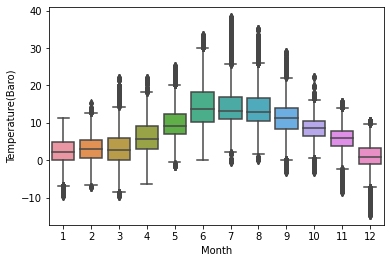

In [3]:
# Barometer temperature against month
sns.boxplot(x='Month',y='Temperature(Baro)',data=mergeDf)

<AxesSubplot:xlabel='Hour', ylabel='Temperature(Baro)'>

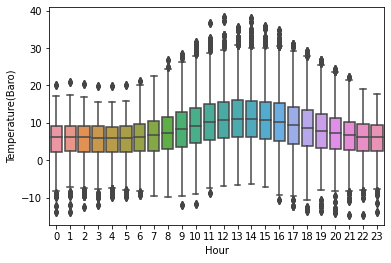

In [40]:
# Barometer temperature against hour
sns.boxplot(x='Hour',y='Temperature(Baro)',data=mergeDf)

<AxesSubplot:xlabel='Month', ylabel='Temperature(Logger)'>

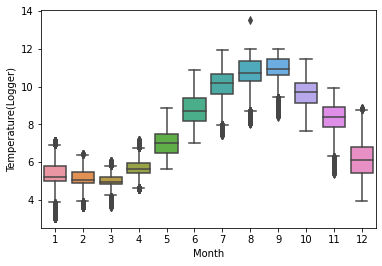

In [41]:
# Logger temperature against month
sns.boxplot(x='Month',y='Temperature(Logger)',data=mergeDf)

<AxesSubplot:xlabel='Hour', ylabel='Temperature(Logger)'>

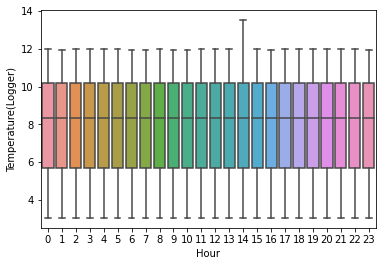

In [42]:
# Logger temperature against hour
sns.boxplot(x='Hour',y='Temperature(Logger)',data=mergeDf)

Text(0, 0.5, 'Temperature (C)')

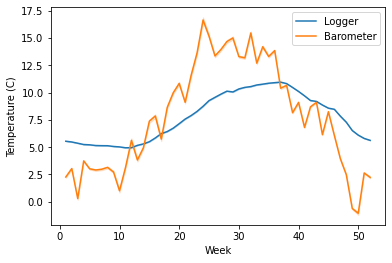

In [43]:
# Barometer vs logger temperature against week
ax = sns.lineplot(x='Week',y='Temperature(Logger)',data=mergeDf)
sns.lineplot(x='Week',y='Temperature(Baro)',data=mergeDf, ax=ax)
ax.legend(['Logger','Barometer'])
ax.set_ylabel('Temperature (C)')

Text(0, 0.5, 'Temperature (C)')

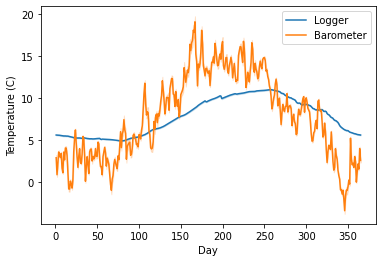

In [44]:
# Barometer vs logger temperature against day
ax = sns.lineplot(x='Day',y='Temperature(Logger)',data=mergeDf)
sns.lineplot(x='Day',y='Temperature(Baro)',data=mergeDf, ax=ax)
ax.legend(['Logger','Barometer'])
ax.set_ylabel('Temperature (C)')

Text(0, 0.5, 'Temperature (C)')

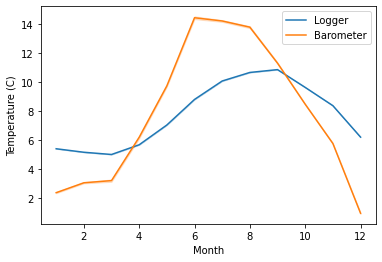

In [45]:
# Barometer vs logger temperature against month
ax = sns.lineplot(x='Month',y='Temperature(Logger)',data=mergeDf)
sns.lineplot(x='Month',y='Temperature(Baro)',data=mergeDf, ax=ax)
ax.legend(['Logger','Barometer'])
ax.set_ylabel('Temperature (C)')

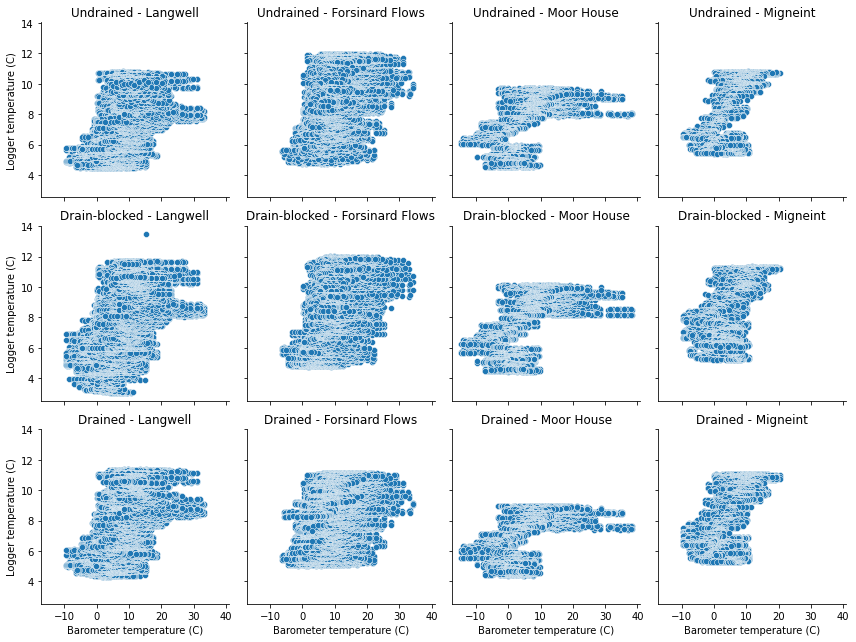

In [52]:
# Barometer vs logger temperature at each region/site 
g = sns.FacetGrid(mergeDf, col = 'Site',row = 'Region', row_order = hueorder)
g.map(sns.scatterplot, "Temperature(Baro)", "Temperature(Logger)")

Titles = ['Undrained - Langwell',
          'Undrained - Forsinard Flows',
          'Undrained - Moor House',
          'Undrained - Migneint',
          'Drain-blocked - Langwell',
          'Drain-blocked - Forsinard Flows',
          'Drain-blocked - Moor House',
          'Drain-blocked - Migneint',
          'Drained - Langwell',
          'Drained - Forsinard Flows',
          'Drained - Moor House',
          'Drained - Migneint']

i=0
for axg in g.axes:
    for ax in axg:
        ax.set_xlabel('Barometer temperature (C)')
        ax.set_ylabel('Logger temperature (C)')
        ax.set_title(Titles[i])
        i+=1

Text(0.5, 0, '')

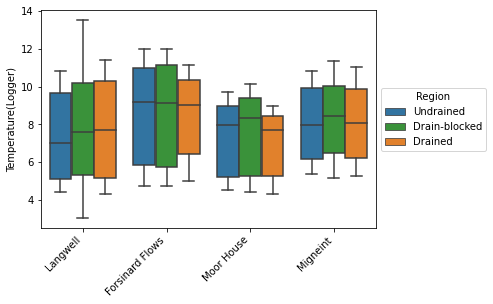

In [48]:
# Logger temperature at each region/site
healthColours = {'NN':'tab:blue','RES':'tab:green','DAM':'tab:orange'}
hueorder = ['NN','RES','DAM']
ax = sns.boxplot(y='Temperature(Logger)',x='Site', hue = 'Region', palette = healthColours, hue_order = hueorder, data=mergeDf)
plt.xticks(rotation=45, ha='right')
ax.set_xticklabels(['Langwell','Forsinard Flows', 'Moor House', 'Migneint'])
current_handles, current_labels = plt.gca().get_legend_handles_labels()
plt.legend(labels = ['Undrained','Drain-blocked','Drained'], handles = current_handles, loc='center left', bbox_to_anchor=(1, 0.5), title = 'Region')
ax.set_xlabel('')

In [49]:
# Variation in logger temperature at each region/site
print(mergeDf.groupby(['Site','Region'])['Temperature(Logger)'].var())

Site  Region
FF    DAM       3.845144
      NN        5.851302
      RES       6.145006
LW    DAM       5.781487
      NN        4.725548
      RES       5.601098
MH    DAM       2.362314
      NN        3.130301
      RES       4.040466
Mig   DAM       3.900560
      NN        3.963493
      RES       3.781166
Name: Temperature(Logger), dtype: float64


Broad conclusions:
 - Logger temperature experiences less variation than surface temperature and never drops below 3 C. 
 - Logger temperature lags behind surface temperature. It takes longer to heat up and cool down. 
 - Drained regions have less variability in logger temperature than undrained or drain-blocked regions.
 
Why?
 - Specific heat capacity of water.
 - Insulating effects of peat and vegetation. 
 - Drained peat has higher specific heat capacity and greater water table depth. This increases the insulating effect of the peat on the water temperature.


## 2. Water table depth

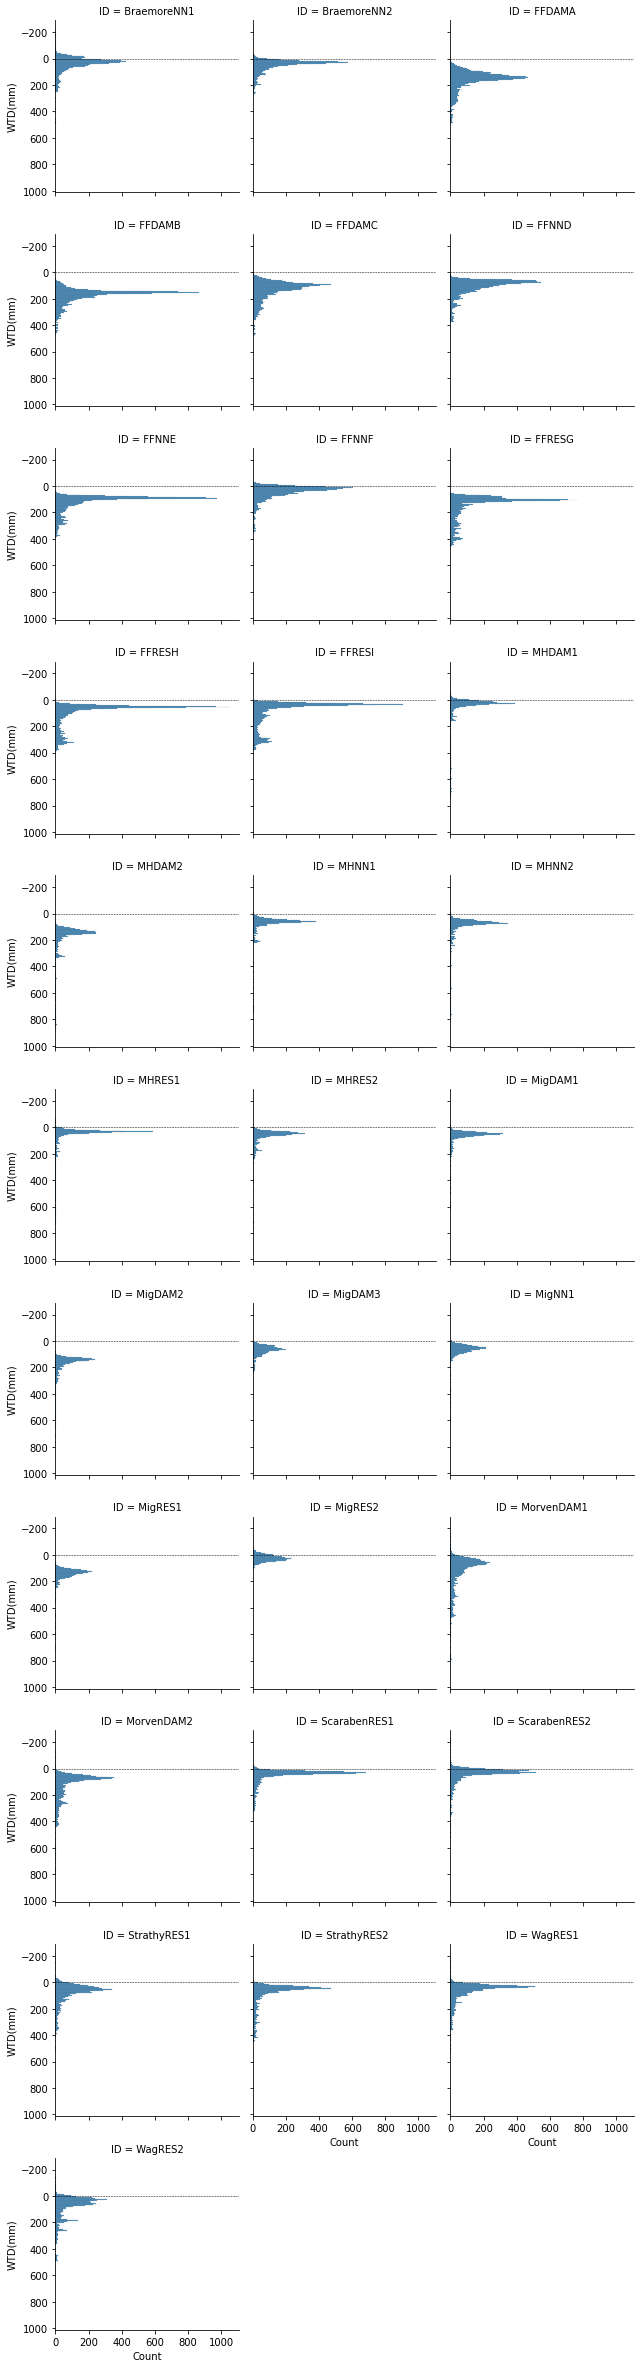

In [12]:
# Histograms of water table depth for each logger
Titles = ['FF, Drained, Logger i',
          'FF, Drained, Logger ii',
          'FF, Drained, Logger iii',
          'FF, Undrained, Logger i',
          'FF, Undrained, Logger ii',
          'FF, Undrained, Logger iii',
          'FF, Drain-blocked, Logger i',
          'FF, Drain-blocked, Logger ii',
          'FF, Drain-blocked, Logger iii',
          'MH, Drained, Logger i',
          'MH, Drained, Logger ii',
          'MH, Undrained, Logger i',
          'MH, Undrained, Logger ii',
          'MH, Drain-blocked, Logger i',
          'MH, Drain-blocked, Logger ii',
          'MG, Drained, Logger i',
          'MG, Drained, Logger ii',
          'MG, Drained, Logger iii',
          'MG, Undrained, Logger i',
          'MG, Drain-blocked, Logger i',
          'MG, Drain-blocked, Logger ii']

g = sns.displot(data=mergeDf, col='ID', y='WTD(mm)', kind='hist', col_wrap = 3, height=3, row_order = hueorder)

i=0
for ax in g.axes:
    ax.invert_yaxis()
    ax.axhline(0, c = 'k', linestyle = '--', linewidth = .5)
#    ax.set_title(Titles[i])
    i+=1

[Text(0, 0, 'MigNN1*'),
 Text(1, 0, 'MigRES1'),
 Text(2, 0, 'MigRES2'),
 Text(3, 0, 'MigDAM1'),
 Text(4, 0, 'MigDAM2'),
 Text(5, 0, 'MigDAM3*')]

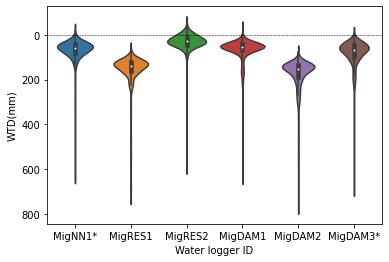

In [13]:
# Violin plot of WTD at Migneint
subDf = mergeDf[mergeDf['Site'] == 'Mig']
ax = sns.violinplot(y='WTD(mm)',x='ID', data=subDf, order=['MigNN1','MigRES1','MigRES2','MigDAM1','MigDAM2','MigDAM3'])
ax.invert_yaxis()
ax.axhline(0, c = 'k', linestyle = '--', linewidth = .5)
ax.set_xlabel('Water logger ID')
ax.set_xticklabels(['MigNN1*','MigRES1','MigRES2','MigDAM1','MigDAM2','MigDAM3*'])

MigRES1 and MigDAM2 are downslope of the drain whereas MigRes2 and MigDAM1 are upslope of the drain. Position of logger relative to drain has a large impact on water table depth.

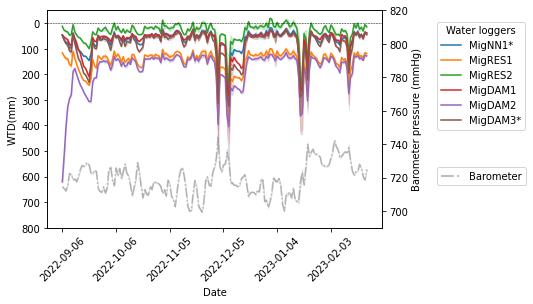

In [14]:
# Line plot of WTD at Migneint. Barometer pressure plotted on a secondary axis.
fig, ax = plt.subplots()
sns.lineplot(y='WTD(mm)',x='Date',hue='ID', data=subDf, hue_order=['MigNN1','MigRES1','MigRES2','MigDAM1','MigDAM2','MigDAM3'],ax=ax)
#ax = sns.lineplot(y='WTD(mm)',x='Date', data=subDf)
ax.set_ylim([-50,800])
ax.invert_yaxis()
ax.axhline(0, c = 'k', linestyle = '--', linewidth = .5)
ax2 = plt.twinx()
sns.lineplot(y='mmHg(Baro Adj)',x='Date', ax=ax2, data = subDf, alpha = .5, linestyle = '-.', color='grey')
ax2.set_ylim([690,820])
ax2.set_ylabel('Barometer pressure (mmHg)')
loc = plticker.MultipleLocator(base=30) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.tick_params(axis='x', labelrotation = 45)
custom_line = [Line2D([0], [0], color='grey', lw=2, linestyle = '-.', alpha = 0.5)]
ax.legend(loc='center left', labels = ['MigNN1*','MigRES1','MigRES2','MigDAM1','MigDAM2','MigDAM3*'], bbox_to_anchor=(1.15, 0.7), title = 'Water loggers')
ax2.legend(custom_line, ['Barometer'], bbox_to_anchor=(1.15, 0.3),)

The are some spikes in water table depth that seem to be coincide with spikes in barometer (i.e. surface) pressure. This could be a technical issue.
The values from MigDam2 take a while to settle following logger installation.

[Text(0, 0, 'MHNN1'),
 Text(1, 0, 'MHNN2*'),
 Text(2, 0, 'MHRES1'),
 Text(3, 0, 'MHRES2*'),
 Text(4, 0, 'MHDAM1'),
 Text(5, 0, 'MHDAM2*')]

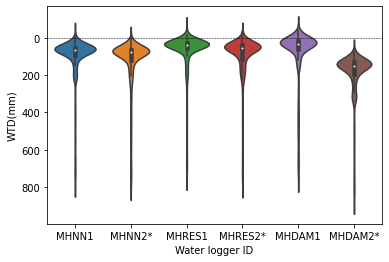

In [15]:
# Violin plot of WTD at Moor House
subDf = mergeDf[mergeDf['Site'] == 'MH']
ax = sns.violinplot(y='WTD(mm)',x='ID', data=subDf, order =['MHNN1','MHNN2','MHRES1','MHRES2','MHDAM1','MHDAM2'])
ax.invert_yaxis()
ax.axhline(0, c = 'k', linestyle = '--', linewidth = .5)
ax.set_xlabel('Water logger ID')
ax.set_xticklabels(['MHNN1','MHNN2*','MHRES1','MHRES2*','MHDAM1','MHDAM2*'])

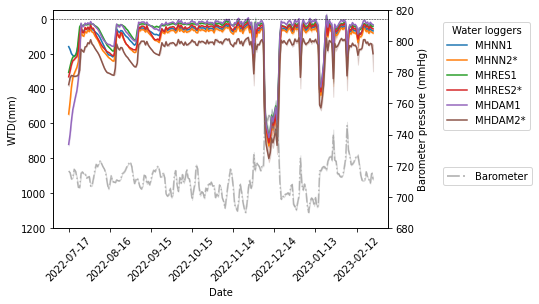

In [16]:
# Violin plot of WTD at Moor House. Barometer pressure plotted on a secondary axis.
fig, ax = plt.subplots()
sns.lineplot(y='WTD(mm)',x='Date',hue='ID', data=subDf, hue_order=['MHNN1','MHNN2','MHRES1','MHRES2','MHDAM1','MHDAM2'],ax=ax)
#ax = sns.lineplot(y='WTD(mm)',x='Date', data=subDf)
ax.set_ylim([-50,1200])
ax.invert_yaxis()
ax.axhline(0, c = 'k', linestyle = '--', linewidth = .5)
ax2 = plt.twinx()
sns.lineplot(y='mmHg(Baro Adj)',x='Date', ax=ax2, data = subDf, alpha = .5, linestyle = '-.', color='grey')
ax2.set_ylim([680,820])
ax2.set_ylabel('Barometer pressure (mmHg)')
loc = plticker.MultipleLocator(base=30) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.tick_params(axis='x', labelrotation = 45)
custom_line = [Line2D([0], [0], color='grey', lw=2, linestyle = '-.', alpha = 0.5)]
ax.legend(loc='center left', labels=['MHNN1','MHNN2*','MHRES1','MHRES2*','MHDAM1','MHDAM2*'], bbox_to_anchor=(1.15, 0.7), title = 'Water loggers')
ax2.legend(custom_line, ['Barometer'], bbox_to_anchor=(1.15, 0.3),)

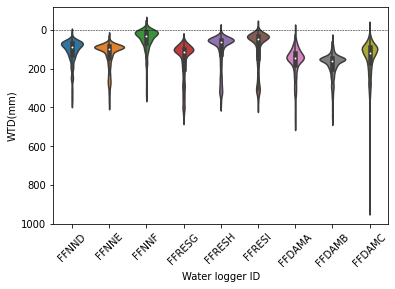

In [17]:
# Violin plot of WTD at Forsinard Flows
subDf = mergeDf[mergeDf['Site'] == 'FF']
ax = sns.violinplot(y='WTD(mm)',x='ID', data=subDf, order = ['FFNND','FFNNE','FFNNF','FFRESG','FFRESH','FFRESI','FFDAMA','FFDAMB','FFDAMC'])
ax.invert_yaxis()
ax.axhline(0, c = 'k', linestyle = '--', linewidth = .5)
ax.set_xlabel('Water logger ID')
ax.tick_params(axis='x', labelrotation = 45)

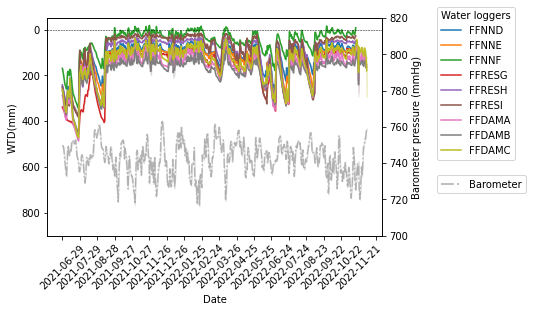

In [18]:
# Line plot of WTD at Forsinard Flows. Barometer pressure plotted on a secondary axis.
fig, ax = plt.subplots()
sns.lineplot(y='WTD(mm)',x='Date',hue='ID', data=subDf, hue_order=['FFNND','FFNNE','FFNNF','FFRESG','FFRESH','FFRESI','FFDAMA','FFDAMB','FFDAMC'],ax=ax)
#ax = sns.lineplot(y='WTD(mm)',x='Date', data=subDf)
ax.set_ylim([-50,900])
ax.invert_yaxis()
ax.axhline(0, c = 'k', linestyle = '--', linewidth = .5)
ax2 = plt.twinx()
sns.lineplot(y='mmHg(Baro Adj)',x='Date', ax=ax2, data = subDf, alpha = .5, linestyle = '-.', color='grey')
ax2.set_ylim([700,820])
ax2.set_ylabel('Barometer pressure (mmHg)')
loc = plticker.MultipleLocator(base=30) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.tick_params(axis='x', labelrotation = 45)
custom_line = [Line2D([0], [0], color='grey', lw=2, linestyle = '-.', alpha = 0.5)]
ax.legend(loc='center left', bbox_to_anchor=(1.15, 0.7), title = 'Water loggers')
ax2.legend(custom_line, ['Barometer'], bbox_to_anchor=(1.15, 0.3),)

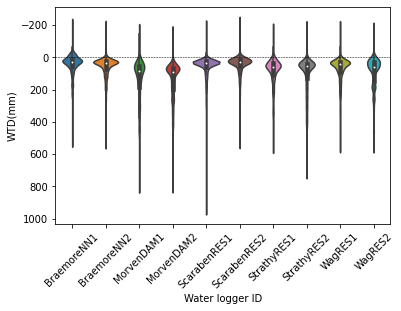

In [19]:
# Violin plot of WTD at Langwell
subDf = mergeDf[mergeDf['Site'] == 'LW']
ax = sns.violinplot(y='WTD(mm)',x='ID', data=subDf)
ax.invert_yaxis()
ax.axhline(0, c = 'k', linestyle = '--', linewidth = .5)
ax.set_xlabel('Water logger ID')
ax.tick_params(axis='x', labelrotation = 45)

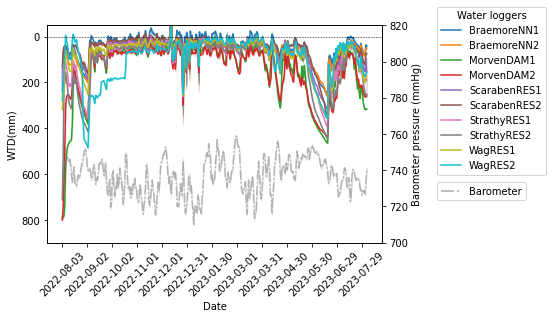

In [22]:
# Line plot of WTD at Langwell. Barometer pressure plotted on a secondary axis.
fig, ax = plt.subplots()
sns.lineplot(y='WTD(mm)',x='Date',hue='ID', data=subDf,ax=ax)
#ax = sns.lineplot(y='WTD(mm)',x='Date', data=subDf)
ax.set_ylim([-50,900])
ax.invert_yaxis()
ax.axhline(0, c = 'k', linestyle = '--', linewidth = .5)
ax2 = plt.twinx()
sns.lineplot(y='mmHg(Baro Adj)',x='Date', ax=ax2, data = subDf, alpha = .5, linestyle = '-.', color='grey')
ax2.set_ylim([700,820])
ax2.set_ylabel('Barometer pressure (mmHg)')
loc = plticker.MultipleLocator(base=30) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.tick_params(axis='x', labelrotation = 45)
custom_line = [Line2D([0], [0], color='grey', lw=2, linestyle = '-.', alpha = 0.5)]
ax.legend(loc='center left', bbox_to_anchor=(1.15, 0.7), title = 'Water loggers')
ax2.legend(custom_line, ['Barometer'], bbox_to_anchor=(1.15, 0.3),)

In [24]:
# Summarise the data from each logger
A = mergeDf[["ID", "WTD(mm)"]].groupby("ID").mean()
A['median'] = mergeDf[["ID", "WTD(mm)"]].groupby("ID").median()
A['max'] = mergeDf[["ID", "WTD(mm)"]].groupby("ID").max()
A['min'] = mergeDf[["ID", "WTD(mm)"]].groupby("ID").min()
A['sd'] = mergeDf[["ID", "WTD(mm)"]].groupby("ID").std()
A.to_csv('WTD_summary_stats.csv')
A

,WTD(mm),median,max,min,sd
ID,,,,,
BraemoreNN1,42.632411,28.119266,535.488398,-218.305517,61.320001
BraemoreNN2,56.302998,37.460620,546.773851,-206.666591,57.312173
FFDAMA,165.528569,146.761701,492.727087,-2.634853,78.584249
FFDAMB,182.790984,159.914478,470.629129,44.912167,65.491087
FFDAMC,144.326423,119.295111,926.090883,-15.800757,82.734070
FFNND,113.936819,91.063175,379.048179,14.689982,66.222077
FFNNE,129.614909,97.704177,388.646115,34.489681,69.506444
FFNNF,52.173554,32.076237,349.042594,-46.543547,63.320231
FFRESG,162.463459,113.363957,455.674300,48.741689,99.484865


Broad conclusions:
 - Position of logger relative to drain has large impact on water table depth (e.g. MIGRES1 vs MIGRES2, MIGDAM1 vs MIGDAM2).
 - Some spikes in water table depth are due to sudden spikes in barometer pressure (e.g. Moor House November 2022). 
 - Undrained and Drain-blocked loggers have higher mean WTD and lower variance than drained loggers in general.
 - The lowest values are detected in drained bogs. 
